![title](img/genetics-bioinformatics.jpg)

# Sequence Alignment with Dynamic Programming: Application of Smith–Waterman & Needleman–Wunsch algorithms

# Section 1: Briefly Dynamic Programming


Dynamic Programming is a programming approach used in order to increase efficiency of the solution process, by calculating the overlapping subproblems once and recording them for recurrent uses. There are two feasibility conditions that a problem needs to met before determining whether Dynamic Programming can be used.

**These two conditions are:**

1. Problem can be disintegrated into Overlapping Subproblems.
2. Problem and its subproblems must show Optimal Substructure Property.

## Overlapping Subproblems:

If a problem can be dismantled in the subproblems that occur simultaneously or consecutively, it can be said that the problem has an Overlapping Subproblems property.

## Optimal Substructure Property:

If optimal solution to a problem can be achieved from the optimal solutions of its subproblems, it can be said that the problem has an Optimal Substructure property.

# Section 2: Sequence Alignment Problem: Attempt to find the Ancestral Sequence

Evolution has a huge impact on organisms and their current identity. By evolution, broadly speaking, nucleotide/protein compositions of organisms can change through mutation and selection over very long time. Mutations that cause these change can be classified in two types: substitution and insertion/deletion. 

## Substitution: 

As some sequences evolving through time, some components change to one another, this change referred as a substitution.

## Insertion/Deletion: 

Through time, some other sequences might enter between the original sequence or some subsequences might disappear, this changes classified as insertion and deletion mutation.


If a DNA sequence defined over an alphabet with letters {A,C,T,G}, these operations can be illustrated as a model below:

![title](img/SE-mutations.png)

So, with these operations same genetical materials becomes slightly more different in closely related species. This difference expected to increase as relation become more ambiguous or distant. Scientist today can reach the genetic material of available species, but how about their ancestral genes? What is the original sequence? What operations possibly went underway, so that different sequences at different species occurred? What are their similarities and differences, and where they are exactly? These are the main questions in biology and sequence alignment tries to interpret these operations. 

But what is an alignment? Alignment of two sequence is simply a representation of these sequences put on top of each other, and pair them in a way that in the end both of them gets to same length. This is achieved by adding gaps to both sequences whenever felt necessary. For the general alignment cases, firstly global alignment must be taken into consideration. Briefly, global alignment tries to align elements of given sequences, specifically pair every element once among the sequences during the process. It is also called end-to-end alignment. Some feasibility conditions should be hold in order to call an alignment as global alignment. These feasibility constraints are:

- **Sequences must be in same length in the end.**
- **Dashes/gaps cannot be paired with itself between sequences.**
- **If dashes are removed from sequences, same initial sequences are achieved.**

![title](img/global-local-alignments.png)

Now the global alignment problem and its feasibility conditions are known; but with these conditions, numerous global alignment can be achieved from given two sequences. That leads to next question: How an optimal alignment can be found? The alignment that might model ancestral sequence, or gives best insights about structural relations of given sequences. Hence an optimality condition must be set additional to the feasibility conditions. For optimality condition, setting a scoring scheme and evaluate the alignments according to this total score of the pairs is one solution. For the pairs that to be thought as a good match, positive score can be set at the matrix; and for the bad matches, or matches with "dashes", penalty score can be set. Thus created pairs can be scored and at the end total score of each alignment can be acquired. Alignment with the maximum score evaluated as optimal alignment among other alignments. Therefore optimality conditions can be created and manipulated whenever felt necessary.

In Algorithmic thinking perspective, we can clarify the global sequence alignment problem a bit more by determining inputs and outputs of the problem. 

- **Our input:** Two sequences: X, Y and scoring matrix M.

- **Our Output:** Global alignment sequences of X and Y and their maximum alignment score.

Second alignment that will be used is local alignment. Some genes or their certain parts can be preserved better through time. In this case -where same genes of the related two species are taken into account- trying to find just these local parts and eliminating the rest is meaningful. Given two sequences, finding this partly alignment is called local alignment problem.

More detailed explanations and mathematical representations of these alignments and their functional inputs and outputs can be found in here, provided by the course instructor.

# Section 3: Algorithms Needleman–Wunsch and Smith–Waterman to solve global and local alignments:

## Briefly the Algorithms:

Needleman-Wunsch algorithm uses dynamic programming approach to tackle global alignment problem. It divides the problem to its subproblems, iterate and save the progress to an alignment matrix. Later it uses traceback method and finds the optimal global alignment.  

Let's think of the following subproblem: 

**F(i, j)** represents the optimal alignment score between **X[1:i] and Y[1:j]**. **F(n, m)** will be optimal alignment score for global alignment problem, where **n, m** are the length of the sequences. And **F(i, j)** be can calculated directly if **F(i-1, j), F(i, j-1) and F(i-1,j-1)** known: 

**F(i, j) = max( F(i, j-1) + related penalty score, F(i-1, j)+related penalty score, F(i-1, j-1) + pair score).** 
We can think of this function as a **n x n matrix S**, where **S[i][j]** = **F(i, j)**. *In Needleman-Wunsch Algorithm*, after initializing the first row and column of **matrix S**, all other elements of the matrix calculated based on the formula above. Now the optimal global alignment score is stored in **S[n][m]**. In order to create the aligned sequences, traceback is initiated from the right bottom of the matrix.  For detailed information about the algorithm, please refer to this article.

*Smith-Waterman algorithm* uses a variation of *Needleman-Wunsch algorithm*. In the alignment **matrix S**, it replaces negative values with zero and initiates the traceback not from the right bottom, but from the maximum entry. After traceback is initiated, it stops at the first zero entry it reaches. Since the local alignments have the maximum optimal alignment score,  it finds local alignments.

## Implementation in Python:

Function below takes both sequences, scoring matrix and global flag, which helps us to return local or global alignment matrix. According to global_flag, the function creates an alignment matrix S, in order to be used at the traceback phase.

In [12]:
def compute_alignment_matrix(seq_x, seq_y, scoring_matrix, global_flag):
    """
    Computes alligment matrix according to global flag, 
    with this matrix, max scores of possible subsequence pairs can be observed
    """
    
    lenght_x = len(seq_x)
    lenght_y = len(seq_y)
    alignment_matrix = [ [] for dummy_i in range(lenght_x+1)]
    alignment_matrix[0].append(0)
    
    if global_flag == True: #If we will use for Needlwman-Wunsch: global alignment
        for key_i in range(1,lenght_x+1): #column initialization
            alignment_matrix[key_i].append(alignment_matrix[key_i-1][0] +  \
                                             scoring_matrix[seq_x[key_i-1]]["-"])
        for key_j in range(1,lenght_y+1): #row initialization
            alignment_matrix[0].append(alignment_matrix[0][key_j-1] + scoring_matrix["-"][seq_y[key_j-1]])
        
        for key_i in range(1,lenght_x+1): #iteration
            for key_j in range(1,lenght_y+1):
                alignment_matrix[key_i].\
                    append(max(alignment_matrix[key_i-1][key_j-1] + scoring_matrix[seq_x[key_i-1]][seq_y[key_j-1]], \
                               alignment_matrix[key_i-1][key_j] + scoring_matrix[seq_x[key_i-1]]["-"], \
                               alignment_matrix[key_i][key_j-1] + scoring_matrix["-"][seq_y[key_j-1]]))
        return alignment_matrix
    
    else: # Case for Smith-Waterman: Local Alignments
        for key_i in range(1,lenght_x+1):#column initialization assumend that gaps create negative values: set to 0
            alignment_matrix[key_i].append(0) 
        for dummy_j in range(1,lenght_y+1): #row initialization assumend that gaps create negative values: set to 0
            alignment_matrix[0].append(0 )
        
        for key_i in range(1,lenght_x+1): #iteration
            for key_j in range(1,lenght_y+1):
                alignment_matrix[key_i].\
                    append(max(0, #We dont want negative values
                    alignment_matrix[key_i-1][key_j-1] + scoring_matrix[seq_x[key_i-1]][seq_y[key_j-1]], \
                    alignment_matrix[key_i-1][key_j] + scoring_matrix[seq_x[key_i-1]]["-"], \
                    alignment_matrix[key_i][key_j-1] + scoring_matrix["-"][seq_y[key_j-1]]))
        return alignment_matrix



After the alignment matrix calculated, traceback can be done by the function below. This completes the Needleman-Wunsch algorithm, with this piece of code globally aligned pairs can be obtained.

In [13]:
def compute_global_alignment(seq_x, seq_y, scoring_matrix, alignment_matrix):
    """
    Completes the Needleman–Wunsch Algorithm, after alignment matrix phase completed.  
    This function takes both sequences together with scoring matrix and alignment matrix
    Starting from aligment matrix' last entry, it computes the sequuences according to 3 prior 
    possible starting points.
    """
    lenght_x = len(seq_x)
    lenght_y = len(seq_y)
    x_fin = "" #start sequences
    y_fin = "" #start sequences
    final_score = alignment_matrix[lenght_x][lenght_y]
    
    while lenght_x <> 0 and lenght_y <> 0:
        x_val, y_val = seq_x[lenght_x -1], seq_y[lenght_y -1]
        poss_1 = alignment_matrix[lenght_x -1][lenght_y-1] + scoring_matrix[x_val][y_val] #first possiblity
        
        if alignment_matrix[lenght_x][lenght_y] == poss_1:
            x_fin = x_val + x_fin
            y_fin = y_val + y_fin
            lenght_x -= 1
            lenght_y -= 1
        else:
            poss_2 = alignment_matrix[lenght_x -1][lenght_y] + scoring_matrix[x_val]["-"]  #second possiblity  
            
            if alignment_matrix[lenght_x][lenght_y] == poss_2:
                x_fin = x_val + x_fin
                y_fin = "-" + y_fin
                lenght_x -= 1
            else:
                x_fin = "-" + x_fin  
                y_fin = y_val + y_fin
                lenght_y -= 1
    #if initial point could be reached, dashes will be added.            
    while lenght_x <> 0:
        x_val = seq_x[lenght_x -1]
        x_fin = x_val + x_fin
        y_fin = "-" + y_fin
        lenght_x -= 1
                
    while lenght_y <> 0:
        y_val = seq_y[lenght_y -1]
        x_fin = "-" + x_fin  
        y_fin = y_val + y_fin
        lenght_y -= 1
        
    return (final_score, x_fin, y_fin)

For local alignments, traceback differs in terms of start and end points. Algorithm below, successfully calculates the local alignments and completes the Smith-Waterman algorithm.


In [14]:
def compute_local_alignment(seq_x, seq_y, scoring_matrix, alignment_matrix): 
    """
    Completes the Smith–Waterman Algorithm, after alignment matrix phase completed. 
    
    By setting global flag False at the allignment matrix and starting from the max entry,
    this algorithm finds only local aligments.
    """
    max_in_alligment = (0,0,0)
    x_lenght = len(seq_x)
    y_lenght = len(seq_y)
    x_fin = ""
    y_fin = ""
    #Search for maximum
    for key_i in range(1,x_lenght+1):
        for key_j in range(1,y_lenght+1):
            aligment_value = alignment_matrix[key_i][key_j]
            if aligment_value > max_in_alligment[0]:
                max_in_alligment = (aligment_value,key_i,key_j)
                
    score = max_in_alligment[0]
    countdown_value =  max_in_alligment[0]
    curr_pos_x, curr_pos_y = max_in_alligment[1], max_in_alligment[2]
    
    while countdown_value > 0: # while our value greater than 0, iterate.
        x_val, y_val = seq_x[curr_pos_x-1], seq_y[curr_pos_y-1]
        poss_1 = alignment_matrix[curr_pos_x -1][curr_pos_y-1] + scoring_matrix[x_val][y_val]
        if alignment_matrix[curr_pos_x][curr_pos_y] == poss_1:
            x_fin = x_val + x_fin
            y_fin = y_val + y_fin
            curr_pos_x -= 1
            curr_pos_y -= 1
            countdown_value = alignment_matrix[curr_pos_x][curr_pos_y]
                
        else:
            poss_2 = alignment_matrix[curr_pos_x -1][curr_pos_y] + scoring_matrix[x_val]["-"]
            if alignment_matrix[curr_pos_x][curr_pos_y] == poss_2:
                x_fin = x_val + x_fin
                y_fin = "-" + y_fin
                curr_pos_x -= 1
            else:
                x_fin = "-" + x_fin  
                y_fin = y_val + y_fin
                curr_pos_y -= 1      
    
    return (score, x_fin, y_fin)

Now that the algorithms are ready, sequence alignment case can be introduced.

## Section 4: Sequence Alignment Case and Helper Codes

## Eyeless Gene, and it's correspondence in different species:

"In 1994, Walter Gehring and colleagues at the University of Basel carried out an "interesting" experiment: they were able to turn on a gene called eyeless in various places on the body of the fruit fly, Drosophila melanogaster. The result was astonishing - fruit flies developed that had whole eyes sprouting up all over their bodies. It turned out that the eyeless is a master regulatory gene - it controls a cascade that contains more than 2000 other genes. Turning it on anywhere in the body activates the cascade and produces a fully formed, but non-functioning, eye. Humans, as well as many other animals, have a slightly different version of the eyeless gene (that is, a similar, yet not identical sequence of the same gene). This observation suggests that about 600 million years ago (the estimated time of divergence between humans and fruit flies) there was an ancestral organism that itself used some version of eyeless, and that throughout the evolution of humans and fruit flies this gene continued to be maintained, albeit while accumulating mutations that did not greatly affect its function. In particular, a substring of the eyeless protein of about 130 amino acids, known as the PAX domain, whose function is to bind specific sequences of DNA, is virtually identical between the human and fruit fly versions of eyeless."*

Genes and scoring matrix are given as URL below, and possible alignments will be scored according to this given PAM50 matrix. Helper functions below will be used to read proteins and PAM50 scoring matrix. 

**Genes and scoring matrix are given as URL below, and possible alignments will be scored according to this given PAM50 matrix. Helper functions below will be used to read proteins and PAM50 scoring matrix.**

![title](img/scoring-matrix.png)

## Helper Functions:

In [15]:
"""
This code is provided by instructors from Rice University
by online Algorithmic Thinking course through online learning platform Coursera.
"""


import math
import random
import urllib2



# URLs for data files
PAM50_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_PAM50.txt"
HUMAN_EYELESS_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_HumanEyelessProtein.txt"
FRUITFLY_EYELESS_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_FruitflyEyelessProtein.txt"
CONSENSUS_PAX_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_ConsensusPAXDomain.txt"
WORD_LIST_URL = "http://storage.googleapis.com/codeskulptor-assets/assets_scrabble_words3.txt"



###############################################
# provided code

def read_scoring_matrix(filename):
    """
    Read a scoring matrix from the file named filename.  

    Argument:
    filename -- name of file containing a scoring matrix

    Returns:
    A dictionary of dictionaries mapping X and Y characters to scores
    """
    scoring_dict = {}
    scoring_file = urllib2.urlopen(filename)
    ykeys = scoring_file.readline()
    ykeychars = ykeys.split()
    for line in scoring_file.readlines():
        vals = line.split()
        xkey = vals.pop(0)
        scoring_dict[xkey] = {}
        for ykey, val in zip(ykeychars, vals):
            scoring_dict[xkey][ykey] = int(val)
    return scoring_dict




def read_protein(filename):
    """
    Read a protein sequence from the file named filename.

    Arguments:
    filename -- name of file containing a protein sequence

    Returns:
    A string representing the protein
    """
    protein_file = urllib2.urlopen(filename)
    protein_seq = protein_file.read()
    protein_seq = protein_seq.rstrip()
    return protein_seq


def read_words(filename):
    """
    Load word list from the file named filename.

    Returns a list of strings.
    """
    # load assets
    word_file = urllib2.urlopen(filename)
    
    # read in files as string
    words = word_file.read()
    
    # template lines and solution lines list of line string
    word_list = words.split('\n')
    print "Loaded a dictionary with", len(word_list), "words"
    return word_list


# Section 5: Analysis of the case

**The task is to determine local or global similarities between human and fruit fly eyeless gene sequences. Compare them by Consensus PAX gene, calculate their agreement and do hypothesis testing over the results to determine the likelihood of randomness. For finding global alignments, *Needleman–Wunsch algorithm* and for the local alignments *Smith–Waterman algorithm* will be used.**

## Comparison of Human and Fruit Fly Eyeless Genes:

In [16]:
human_gene = read_protein(HUMAN_EYELESS_URL)
fruitfly_gene = read_protein(FRUITFLY_EYELESS_URL)
pam_50_matrix = read_scoring_matrix(PAM50_URL)

print "Human Eyeless Gene: ", human_gene
print 
print "Fruitfly Eyeless Gene: ", fruitfly_gene


Human Eyeless Gene:  MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEKQQMGADGMYDKLRMLNGQTGSWGTRPGWYPGTSVPGQPTQDGCQQQEGGGENTNSISSNGEDSDEAQMRLQLKRKLQRNRTSFTQEQIEALEKEFERTHYPDVFARERLAAKIDLPEARIQVWFSNRRAKWRREEKLRNQRRQASNTPSHIPISSSFSTSVYQPIPQPTTPVSSFTSGSMLGRTDTALTNTYSALPPMPSFTMANNLPMQPPVPSQTSSYSCMLPTSPSVNGRSYDTYTPPHMQTHMNSQPMGTSGTTSTGLISPGVSVPVQVPGSEPDMSQYWPRLQ

Fruitfly Eyeless Gene:  MRNLPCLGTAGGSGLGGIAGKPSPTMEAVEASTASHPHSTSSYFATTYYHLTDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQSTGSGSSSTSAGNSISAKVSVSIGGNVSNVASGSRGTLSSSTDLMQTATPLNSSESGGASNSGEGSEQEAIYEKLRLLNTQHAAGPGPLEPARAAPLVGQSPNHLGTRSSHPQLVHGNHQALQQHQQQSWPPRHYSGSWYPTSLSEIPISSAPNIASVTAYASGPSLAHSLSPPNDIESLASIGHQRNCPVATEDIHLKKELDGHQSDETGSGEGENSNGGASNIGNTEDDQARLILKRKLQRNRTSFTNDQIDSLEKEFERTHYPDVFARERLAGKIGLPEARIQVWFSNRRAKWRREEKLRNQRRTPNSTGASATSSSTSATASLTDSPNSLSACSSLLS

As can be seen, length of both sequences differ significantly. It would be reasonable to search for local similarities using local alignment function, rather them align them end-to-end with global alignment function.

## Local Alignment between sample genes

In [17]:
alignment_matrix = compute_alignment_matrix(human_gene, fruitfly_gene, pam_50_matrix, False)
alignment_loc = compute_local_alignment(human_gene, fruitfly_gene, pam_50_matrix, alignment_matrix)

for element in alignment_loc:
    print element

875
HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEK-QQ
HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ


Local alignment function determine significance similarities between human and fruit fly eyeless genes with the score of 875. When both local sequences examined, only small differences noticed

## Comparison to Consensus PAX Domain:

After local similar parts are found, comparison of these gene parts with consensus gene -gene that corresponds the Eyeless PAX6 domain of different species- would also answer the question of their similarity to other PAX6 domains. Consensus domain:

In [18]:
CONSENSUS_PROTEIN = read_protein(CONSENSUS_PAX_URL)
print CONSENSUS_PROTEIN

GHGGVNQLGGVFVNGRPLPDVVRQRIVELAHQGVRPCDISRQLRVSHGCVSKILGRYYETGSIKPGVIGGSKPKVATPKVVEKIAEYKRQNPTMFAWEIRDRLLAERVCDNDTVPSVSSINRIIR


For these purpose, functions below are created. First, dashes should be removed, then results of each sequence should be globally aligned with consensus Pax. After alignment created, their agreement should be calculated.

In [19]:
def delete_dashes(string):
    """
    delete dashes from given string
    """
    dashless_str = ""
    for char in string:
        if char == "-":
            continue
        else:
            dashless_str += char  
    return dashless_str

def calculate_seqs_agreement(seq1,seq2):
    """
    Given two same lenght sequences, this function calculates the perccentage of 
    the agreeing elements over the whole sequences
    """
    assert len(seq1) == len(seq2)
    seq_lenght = len(seq1)
    agr_number = 0
    
    for key_i in range(seq_lenght):
        if seq1[key_i] == seq2[key_i]:
            agr_number += 1
    
    percentage = agr_number/float(seq_lenght)*100   
    return percentage

def compare_seq_cons(seq1, consensus):
    """
    Function that takes sequence and consensus sequence
    Remove their dashes, align them globally and measure the similarity percentage.
    Returns their similarity percentage
    """
    seq1_dashless = delete_dashes(seq1)
    align_m = compute_alignment_matrix(seq1_dashless, consensus, pam_50_matrix, True)
    alignments= compute_global_alignment(seq1_dashless, consensus, pam_50_matrix, align_m)
    percentage = calculate_seqs_agreement(alignments[1], alignments[2])
    
    return percentage
    

Human and Fly alignment sequences recorded previously on variable alignment_loc. Their agreement with consensus domain:

In [20]:
human_cons_perc = compare_seq_cons(alignment_loc[1],CONSENSUS_PROTEIN)
fly_cons_perc = compare_seq_cons(alignment_loc[2],CONSENSUS_PROTEIN)
print "Human-Consensus Agreement Percentage: ", human_cons_perc
print "Fly-Consensus Agreement Percentage: ", fly_cons_perc

Human-Consensus Agreement Percentage:  72.9323308271
Fly-Consensus Agreement Percentage:  70.1492537313


As can be seen similarity is around **70-72%**. Length of the consensus gene is **125**, and to get mentioned percentage, at least **88** amino acid agreements needed. Also if the event type is considered, two sequences with an at least **%70** agreement refers a to binomial process with the success rate **1/24** (23 amino acids and a gap). If its calculated, the result would be **10^(-91)**.  As can be seen from the result, the odds are extremely unlikely.

## Hypothesis Testing

At the last calculation, appearance chance of every protein in the sequence was assumed to be equal. But this is not the case: to avoid this situation and create a better model, a simulation would be more suitable. At this simulation, fruit fly gene will be shuffled while human genome remains the same at every iteration. At each iteration, human and shuffled fruit fly genome will be globally aligned, and their score will be recorded. After repetition of 1000 experiments, scores will be recorded according to their appearance fraction, and later the distribution will be normalized. This function can be seen as:

In [21]:
def generate_null_distribution(seq_x, seq_y, scoring_matrix, num_trials):
    """
    using the sequences, holds trials by randomize one of the given sequence 
    and compute newly created pairs score. Returns the unnormalized distribution of these scores. 
    """
    result_dict = {}
    
    for trial_num in range(num_trials):
        seq_y_copy = (seq_y+".")[:-1]
        
        seq_y_copy = list(seq_y_copy)
        random.shuffle(seq_y_copy)
        "".join(seq_y_copy)
        
        align_m = compute_alignment_matrix(seq_x, seq_y_copy, scoring_matrix, False)
        trail_result = compute_local_alignment(seq_x,seq_y_copy,scoring_matrix, align_m)
        if trail_result[0] in result_dict.keys():
            result_dict[trail_result[0]] += 1
        else:
            result_dict[trail_result[0]] = 1
           
    return result_dict    

def normalize_distribution(dist):
    """
    normalize the entered distribution given as dictionary 
    """
    total = 0
    dist_copy = dist.copy()
    
    for key in dist:
        total += dist[key]
    
    for key in dist:
        dist_copy[key] = dist[key]/float(total)
        
    return dist_copy

If matplotlib is used to create a bar chart to examine the distribution. Following code can be created.

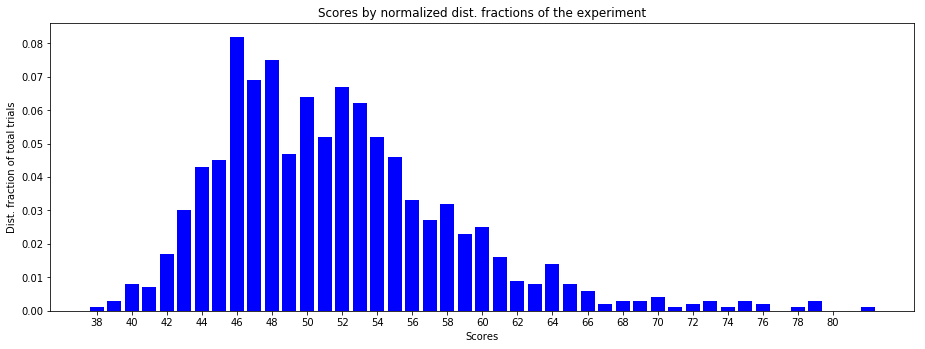

In [24]:
## runtime of this part could be take 5 to 10 mins

import matplotlib.pyplot as plt
import numpy as np

#Using written functions to create distributions.

distribution_unnormalized = generate_null_distribution(human_gene, fruitfly_gene, pam_50_matrix, 1000)
distribution_normalized = normalize_distribution(distribution_unnormalized)
distribution_normalized

#Craeating the plot

keys_normalized = distribution_normalized.keys()
values_normalized = [round(val,3) for val in distribution_normalized.values()]

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(keys_normalized, values_normalized, color='blue')
ax.set_xticks(np.arange(keys_normalized[0], keys_normalized[-1], 2))
ax.set_ylabel('Dist. fraction of total trials')
ax.set_xlabel('Scores')
ax.set_title('Scores by normalized dist. fractions of the experiment')
plt.show()

Distribution resulted in a bell shaped graph as expected, and the scores concentrated mostly around 40 - 60 range. After distribution calculated, simple statistical analysis would be helpful to determine the likelihood of the score 875, found between local alignments of human and fruit fly eyeless genes. In order to do that, mean, variance and z-score will be calculated with the functions written below.

In [25]:
def calculate_mean_std_zscore(normalized_dist,score):
    """
    Gets distribution and calculated score and returns mean,
    standard deviation and zscore of the given dist.
    """
    mean = 0
    total = 0
    
    for key in normalized_dist.keys():
        mean += normalized_dist[key]*key
    
    for key_score in  normalized_dist.keys():
        total += ((key_score-mean)**2)*distribution_normalized[key_score]
        
    std = (total)**(1/2.0)
    
    z_score = (score - mean)/float(std)
    
    return (mean,std,z_score)
    
calculate_mean_std_zscore(distribution_normalized,alignment_loc[0])

(51.618000000000016, 6.6765317343662804, 123.32480886173056)

Implementation of the function resulted with 51.2 mean, 6.67 standard deviation and 123.4 z-score. So the score, that is calculated between the local alignment of human and fruit fly genes, lies in a distance of 123 standard deviation ahead to the mean of the simulated event. The probability of such a situation is around 10^(-3288) as can be seen blow:

![title](img/1618769562195.png) 

If we think probability of winning a lottery is about one in a trillion 10^(-12). This probability above gives an estimate about the likelihood of such a similarity to occur randomly between the local alignments of human and fruit fly eyeless gene.